# 1 - Build your corpus from Reddit


## Web scraping (à nouveau) Récupérer les posts directement d'internet
PRAW, an acronym for "Python Reddit API Wrapper", is a Python package that allows for simple access to Reddit's API. PRAW aims to be easy to use and internally follows all of Reddit's API rules. With PRAW there's no need to introduce sleep calls in your code. Give your client an appropriate user agent and you're set.

#https://scrapingrobot.com/blog/web-scraping-reddit/

### 1 - Installer PRAW : Python Reddit API Wrapper

In [ ]:
#!pip install praw

import praw
import pandas as pd
import datetime

### 2 - créer une application sur le site Reddit
--> you need to create or log into your account on Reddit.

--> click on “Are you a developer? Create an app…”

https://www.reddit.com/prefs/apps

Suivre le Tuto suivant :
https://towardsdatascience.com/scraping-reddit-data-1c0af3040768


In [ ]:
# noter les identifiants de votre apploication personnelle
my_client_id = ""

my_client_secret = ""

my_user_agent = ""

In [4]:
# Initialiser votre instance Reddit 
reddit = praw.Reddit(client_id=my_client_id, client_secret=my_client_secret, user_agent=my_user_agent)

### 3.1 - Extraitre les commentaires d'un subReddit 

In [ ]:

posts = []
ml_subreddit = reddit.subreddit('ChatGPT')
for post in ml_subreddit.hot(limit=10):
    posts.append([ post.title, post.score, post.id, post.subreddit, post.url, 
                  post.num_comments, post.selftext, datetime.datetime.fromtimestamp(post.created)])
df = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 
                                 'body', 'created'])


In [5]:
ml_subreddit = reddit.subreddit('ChatGPT')
posts = []
for post in ml_subreddit.hot(limit=3):
    posts.append([post.id, post.author.name if post.author else "Deleted", post.title, post.selftext, post.subreddit, 
                  post.url, post.num_comments, datetime.datetime.fromtimestamp(post.created),
                 post.ups, post.downs, post.score])
df = pd.DataFrame(posts,columns=['id', 'author','title','Text', 'subreddit', 
                                 'url', 'num_comments', 'created', 
                                 'upvotes','downvotes', 'score'])

In [6]:
df.head(3)

,id,author,title,Text,subreddit,url,num_comments,created,upvotes,downvotes,score
0,1il23g4,HOLUPREDICTIONS,Calling AI Researchers & Startup Founders To J...,r/ChatGPT hit 9 million members today! So we h...,ChatGPT,https://www.reddit.com/r/ChatGPT/comments/1il2...,106,2025-02-09 01:28:24,67,0,67
1,1ggixzy,OpenAI,"AMA with OpenAI’s Sam Altman, Kevin Weil, Srin...",Consider this AMA our Reddit launch.\n\nAsk us...,ChatGPT,https://www.reddit.com/r/ChatGPT/comments/1ggi...,4845,2024-10-31 17:40:38,4065,0,4065
2,1jqeo9u,flyingupvotes,American auto makers after tariffs,Fred. Move over. I’m,ChatGPT,https://i.redd.it/e7v06shzhlse1.jpeg,76,2025-04-03 12:15:29,1336,0,1336


In [7]:
# to save to csv
df.to_csv('Reddit_ChatGPT_test.csv')

In [8]:
print(df['Text'][1])

Consider this AMA our Reddit launch.

Ask us anything about:

* ChatGPT search
* OpenAI o1 and o1-mini
* Advanced Voice
* Research roadmap
* Future of computer agents
* AGI
* What’s coming next
* Whatever else is on your mind (within reason)

Participating in the AMA: 

* sam altman — ceo (u/samaltman)
* Kevin Weil — Chief Product Officer (u/kevinweil)
* Mark Chen — SVP of Research (u/markchen90)
* ​​Srinivas Narayanan —VP Engineering (u/dataisf)
* Jakub Pachocki — Chief Scientist

We'll be online from 10:30am -12:00pm PT to answer questions. 

**PROOF**: [https://x.com/OpenAI/status/1852041839567867970](https://x.com/OpenAI/status/1852041839567867970)  
Username: u/openai



>Update: that's all the time we have, but we'll be back for more in the future. thank you for the great questions. everyone had a lot of fun! and no, ChatGPT did not write this.


In [6]:
import numpy as np
import regex as re
from collections import Counter

In [ ]:
words = df['Text'].apply(lambda x:str(x).split())
top=Counter([item for sublist in words for item in sublist])

In [ ]:
#words[1]

In [11]:
top.most_common(21)

[('*', 16),
 ('the', 8),
 ('to', 6),
 ('this', 4),
 ('and', 4),
 ('ChatGPT', 4),
 ('—', 4),
 ('AI', 3),
 ('✓', 3),
 ('on', 3),
 ('for', 3),
 ('be', 3),
 ('in', 3),
 ('of', 3),
 ('9', 2),
 ('million', 2),
 ('members', 2),
 ('we', 2),
 ('is', 2),
 ('from', 2),
 ('your', 2)]

### 3.2 - Extraitre tous les commentaires de plusieurs subreddits

In [8]:
# définir la liste à extraire
subreddit_list = ['Python', 'ChatGPT','dataisbeautiful','IAmA','programmation','actutech','CryptoFR']
posts = []

# Faire une boucle pour extraire les commentaires
for subreddit_name in subreddit_list:
    subreddit = reddit.subreddit(subreddit_name)

    for post in subreddit.hot(limit=7000):
        posts.append([post.id, post.author.name if post.author else "Deleted", post.title, post.selftext, post.subreddit, 
                      post.url, post.num_comments, datetime.datetime.fromtimestamp(post.created),
                     post.ups, post.downs, post.score])

df = pd.DataFrame(posts,columns=['id', 'author','title','Text', 'subreddit', 
                                     'url', 'num_comments', 'created', 
                                     'upvotes','downvotes', 'score'])

In [15]:
df.shape

(5266, 12)

In [11]:
df.nunique()

id              5266
author          2973
title           5203
Text            3528
subreddit          7
url             5263
num_comments     312
created         5264
upvotes          564
downvotes          1
score            564
dtype: int64

In [12]:
df.head()

,id,author,title,Text,subreddit,url,num_comments,created,upvotes,downvotes,score
0,1jmzwh4,AutoModerator,Sunday Daily Thread: What's everyone working o...,# Weekly Thread: What's Everyone Working On Th...,Python,https://www.reddit.com/r/Python/comments/1jmzw...,5,2025-03-30 01:00:18,5,0,5
1,1jq3vwj,AutoModerator,"Thursday Daily Thread: Python Careers, Courses...","# Weekly Thread: Professional Use, Jobs, and E...",Python,https://www.reddit.com/r/Python/comments/1jq3v...,0,2025-04-03 02:00:30,5,0,5
2,1jqe33f,a_deneb,"[UPDATE] safe-result 4.0: Better memory usage,...","Hi Peeps,\n\n\n\n[safe-result](https://github....",Python,https://www.reddit.com/r/Python/comments/1jqe3...,14,2025-04-03 11:38:11,70,0,70
3,1jqntn9,lrtDam,I wrote on post on why you should start using ...,There has been some discussions about pandas a...,Python,https://www.reddit.com/r/Python/comments/1jqnt...,0,2025-04-03 19:00:48,9,0,9
4,1jqf5zq,martian7r,"Real-Time Speech-to-Speech Chatbot: Whisper, L...","Hi everyone, Please have a look at the **Casca...",Python,https://www.reddit.com/r/Python/comments/1jqf5...,16,2025-04-03 12:46:03,12,0,12


In [ ]:
# to save to csv
df.to_csv('Reddit_ChatGPT_test_avec_commentaires.csv') # sauvegarder les données dans un fichier csv


### 3.3 - Extraitre les commentaires de plusieurs subreddits contenant un terme spécifique

In [ ]:
# définir la liste à extraire
subreddit_list = ['FranceInsoumise', 'Zemmour','AssembleeNationale','Thinkerview',
                  'actualite','konbini','AgenceFrancePresse','franceinfo']
posts = []
# définir le mot recherché
keyword = "macron"

# Faire une boucle pour extraire les commentaires
for subreddit_name in subreddit_list:
    subreddit = reddit.subreddit(subreddit_name)
    
    for post in subreddit.search("macron",limit=7000):
        #si keyword est contenu dans le titre du post
     #   if keyword.casefold() in post.title.casefold() : 
     
            #collecter le post dans notre corpus
        posts.append([post.id, post.author.name if post.author else "Deleted", post.title, 
                          post.selftext, post.subreddit, post.url,
                          post.num_comments, datetime.datetime.fromtimestamp(post.created),
                          post.ups, post.downs, post.score])

df = pd.DataFrame(posts,columns=['id', 'author','title','Text', 'subreddit', 
                                     'url', 'num_comments', 'created', 
                                     'upvotes','downvotes', 'score'])

In [ ]:
#for submission in reddit.subreddit("FranceInsoumise").search("macron"):
 #   print(submission.title)

In [27]:
df.shape

(1004, 11)

In [28]:
df.nunique()

id              1004
author            80
title            987
Text              15
subreddit          7
url             1002
num_comments      74
created         1003
upvotes           72
downvotes          1
score             72
dtype: int64

In [29]:
# to save to csv
df.to_csv('Reddit_macron.csv')

In [4]:
df = pd.read_csv("Reddit_macron.csv", encoding='utf-8') # ouvrir le fichier csv

#Créer un copie de Travail en choisissant uniquement les colonnes qui nous intéressent
df_nd = df[['id','author','title','Text','subreddit','created','score']].copy()
df_nd = df_nd.drop_duplicates().copy()
df_nd.head()

,id,author,title,Text,subreddit,created,score
0,1jk8ild,Nohan07,Macron propose d'expulser les locataires des H...,NaN,FranceInsoumise,2025-03-26 11:22:51,2
1,1j6cwa4,Nohan07,Ukraine - Russie : Macron fait n'importe quoi !,NaN,FranceInsoumise,2025-03-08 09:34:16,2
2,1iuxpxt,Nohan07,Le pacte secret entre Macron et Le Pen ! – Pan...,NaN,FranceInsoumise,2025-02-21 19:20:55,3
3,1it9v25,Nohan07,Marine Le Pen a soutenu un ami de Macron ￼,NaN,FranceInsoumise,2025-02-19 17:39:24,5
4,1imtylh,Nohan07,"Fichage, surveillance, traçage : le gouvernent...",NaN,FranceInsoumise,2025-02-11 09:22:52,5


In [5]:
import datetime
import time
import os
import calendar

df_nd.loc[:, 'year'] = pd.to_datetime(df_nd.created, format='%Y-%m-%d %H:%M:%S').dt.year
df_nd.loc[:, 'month'] = pd.to_datetime(df_nd.created, format='%Y-%m-%d %H:%M:%S').dt.month
df_nd['month_name'] = df_nd["month"].apply(lambda x: calendar.month_abbr[x])
cols=["month_name","year"]
df_nd['period'] = df_nd[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df_nd.head()

,id,author,title,Text,subreddit,created,score,year,month,month_name,period
0,1jk8ild,Nohan07,Macron propose d'expulser les locataires des H...,NaN,FranceInsoumise,2025-03-26 11:22:51,2,2025,3,Mar,Mar-2025
1,1j6cwa4,Nohan07,Ukraine - Russie : Macron fait n'importe quoi !,NaN,FranceInsoumise,2025-03-08 09:34:16,2,2025,3,Mar,Mar-2025
2,1iuxpxt,Nohan07,Le pacte secret entre Macron et Le Pen ! – Pan...,NaN,FranceInsoumise,2025-02-21 19:20:55,3,2025,2,Feb,Feb-2025
3,1it9v25,Nohan07,Marine Le Pen a soutenu un ami de Macron ￼,NaN,FranceInsoumise,2025-02-19 17:39:24,5,2025,2,Feb,Feb-2025
4,1imtylh,Nohan07,"Fichage, surveillance, traçage : le gouvernent...",NaN,FranceInsoumise,2025-02-11 09:22:52,5,2025,2,Feb,Feb-2025


In [6]:
mandat_year=[]
for i in df_nd.index:
    if df_nd['month'][i] >= 5:
        mandat_year.append(df_nd['year'][i]-2017)
    else:
        mandat_year.append(df_nd['year'][i]-2018)

In [7]:
df_nd['mandat'] = mandat_year
df_nd.groupby('mandat').nunique()

,id,author,title,Text,subreddit,created,score,year,month,month_name,period
mandat,,,,,,,,,,,
4,119,15,119,11,3,119,24,2,8,8,8
5,251,24,249,1,5,250,26,2,12,12,12
6,433,32,422,2,6,433,31,2,12,12,12
7,201,34,197,0,6,201,61,2,12,12,12


In [8]:
df_nd.tail()

,id,author,title,Text,subreddit,created,score,year,month,month_name,period,mandat
999,1847pf8,konbini,"Gérard Collomb, ancien maire de Lyon et ancien...",NaN,franceinfo,2023-11-26 11:16:42,0,2023,11,Nov,Nov-2023,6
1000,154qm6b,konbini,"Alors, ça dit quoi ce remaniement d’Emmanuel M...",NaN,franceinfo,2023-07-20 15:14:05,0,2023,7,Jul,Jul-2023,6
1001,123sc94,DrogDrill,Il faut faire tomber le gouvernement Macron!,NaN,franceinfo,2023-03-27 18:31:34,1,2023,3,Mar,Mar-2023,5
1002,yn0om1,infofrance,Emmanuel Macron ne sera pas au départ de la Ro...,NaN,franceinfo,2022-11-05 18:36:54,1,2022,11,Nov,Nov-2022,5
1003,y72b5s,konbini,"Macron félicite Benzema sur Twitter, la France...",NaN,franceinfo,2022-10-18 11:38:11,0,2022,10,Oct,Oct-2022,5


# Analyse initiale des données brutes

## Hashtag les plus utilisés

On va utiliser les expressions régulières (regex) pour définir un modèle qui repère les hashtags dans le texte.
Une fois extraits, on construira un dictionnaire : chaque clé sera un hashtag, et chaque valeur indiquera combien de fois ce hashtag a été utilisé.

/!\ Cette approche peut être utilisée pour tous types de données si vous souhaitez faire une recherche d'un mot spécifique dans le texte.
    Il suffit seulement d'adapter les cellules qui suivent à vos données.. /!\

In [9]:
import re
#To see the most used hashtags.
hashtags = []
hashtag_pattern = re.compile(r"\#[a-zA-Z]+")
hashtag_matches = list(df_nd['title'].apply(hashtag_pattern.findall))
hashtag_dict = {}
for match in hashtag_matches:
    for singlematch in match:
        if singlematch not in hashtag_dict.keys():
            hashtag_dict[singlematch] = 1
        else:
            hashtag_dict[singlematch] = hashtag_dict[singlematch]+1

In [13]:
#Making a list of the most used hashtags and their values
hashtag_ordered_list = sorted(hashtag_dict.items(), key=lambda x:x[1])
hashtag_ordered_list = hashtag_ordered_list[::-1]
#Separating the hashtags and their values into two different lists
hashtag_ordered_values = []
hashtag_ordered_keys = []
#Pick the 20 most used hashtags to plot
for item in hashtag_ordered_list[0:200]:
    hashtag_ordered_keys.append(item[0])
    hashtag_ordered_values.append(item[1])

In [14]:
hashtag_ordered_keys

['#AFP',
 '#Macron',
 '#AFPTV',
 '#Retraites',
 '#QAG',
 '#papillomavirus',
 '#Na',
 '#Covid',
 '#Biden',
 '#Scholz',
 '#Papillomavirus',
 '#IVG',
 '#SavinesLeLac',
 '#afpgraphics',
 '#promulgation',
 '#AFPVertical',
 '#Noum',
 '#McKinseyGate',
 '#MacronArena',
 '#Castex',
 '#stadedefrance',
 '#rugby',
 '#KarlOlive',
 '#macron',
 '#d',
 '#surveillance',
 '#cessezlefeu',
 '#Gaza',
 '#franceinsoumise',
 '#politique',
 '#MarcheDestitution']

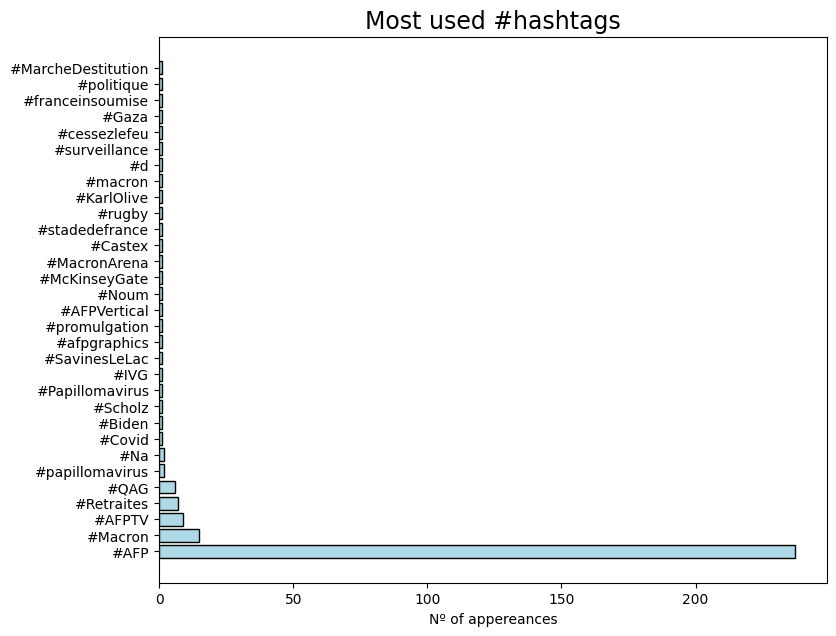

In [23]:
#Plotting a graph with the most used hashtags
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (9,7))
y_pos = np.arange(len(hashtag_ordered_keys))
ax.barh(y_pos ,list(hashtag_ordered_values), align='center',
        color = 'lightblue', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos)
ax.set_yticklabels(list(hashtag_ordered_keys))
ax.set_xlabel("Nº of appereances")
ax.set_title("Most used #hashtags", fontsize = 17)
plt.tight_layout(pad=3)
plt.show()

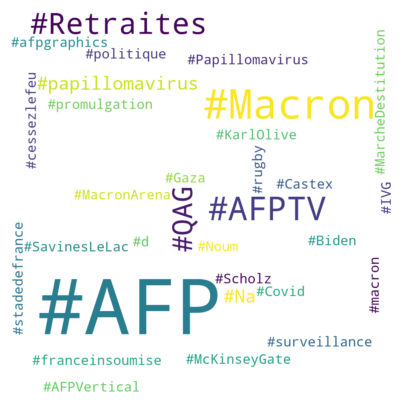

In [24]:
#Make a wordcloud plot of the most used hashtags, for this we need a #dictionary 
#where the keys are the words and the values are the number of #appearances
from wordcloud import WordCloud
hashtag_ordered_dict = {}
for item in hashtag_ordered_list[0:200]:
    hashtag_ordered_dict[item[0]] = item[1]
wordcloud = WordCloud(width=1000, height=1000, random_state=21, max_font_size=200, background_color = 'white').generate_from_frequencies(hashtag_ordered_dict)
plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')

plt.show()